In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
import seaborn as sns

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.shape

(506, 13)

In [5]:
## To know about boston dataset keys
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
## Description of each keys in dataset
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
l1 = boston.feature_names
l1 = list(l1)
print(l1)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [8]:
## changing the columns name 
dictionray = dict(enumerate(l1))
print(dictionray)

df = df.rename( columns= dictionray)

{0: 'CRIM', 1: 'ZN', 2: 'INDUS', 3: 'CHAS', 4: 'NOX', 5: 'RM', 6: 'AGE', 7: 'DIS', 8: 'RAD', 9: 'TAX', 10: 'PTRATIO', 11: 'B', 12: 'LSTAT'}


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df['MEDV']= boston.target

## Exploaratory data analysis

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
## Checking data type and Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
## checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
## checking skewness 
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

Skewness is present in most of the columns and now we can check it through vizualization

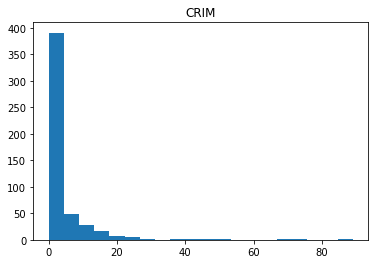

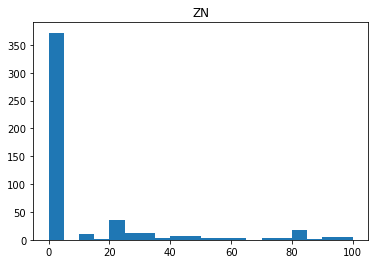

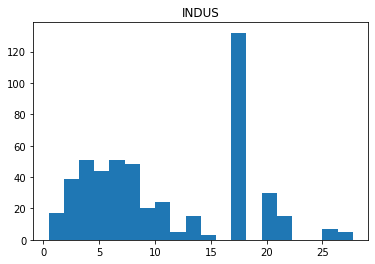

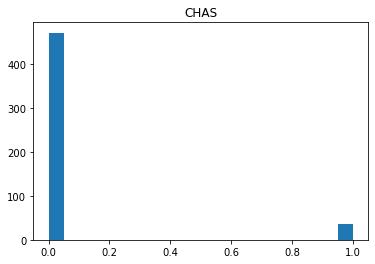

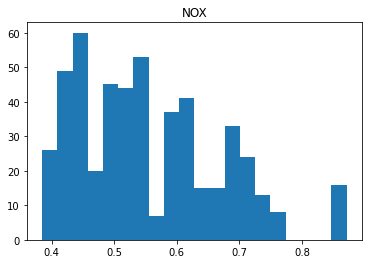

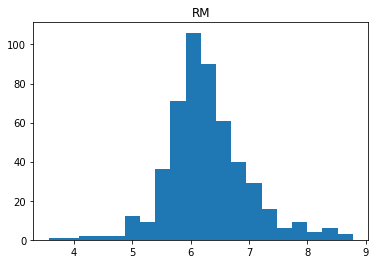

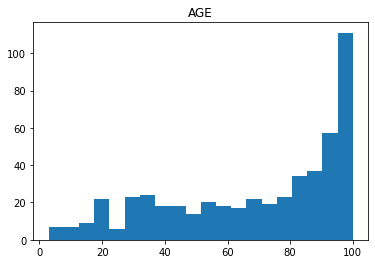

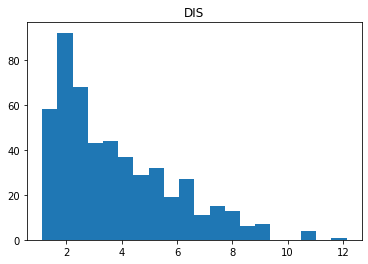

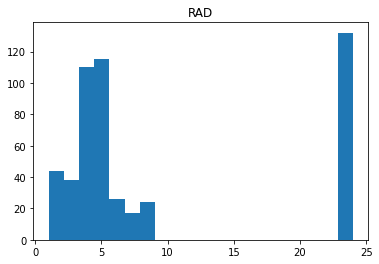

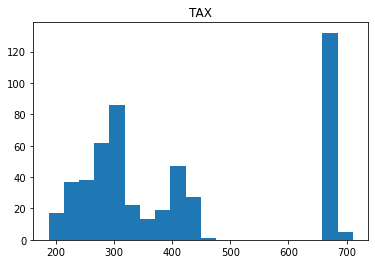

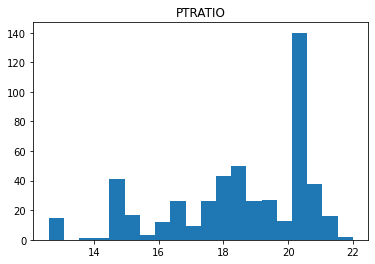

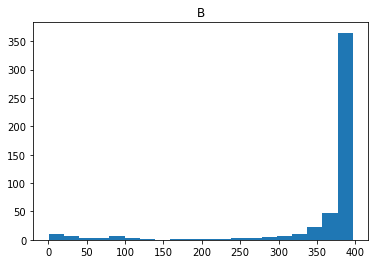

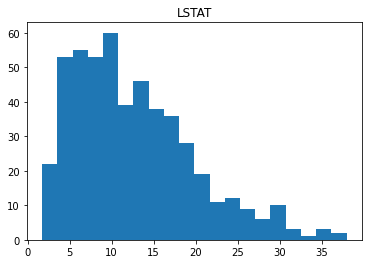

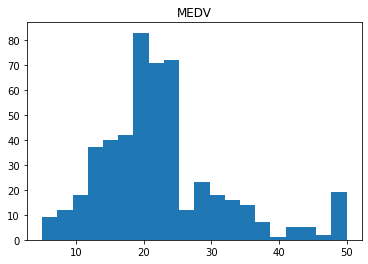

In [15]:
##  Plotting each of the feature to check it's distirbution

for feature in df.columns:
    plt.hist(x=df[feature],bins=20)
    plt.title(feature)
    plt.show()

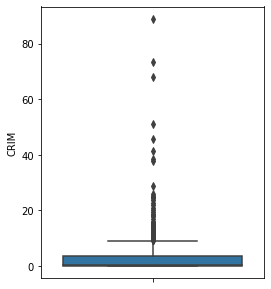

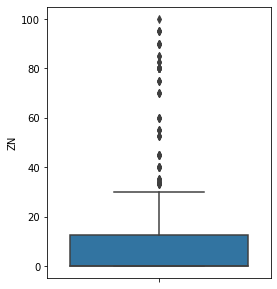

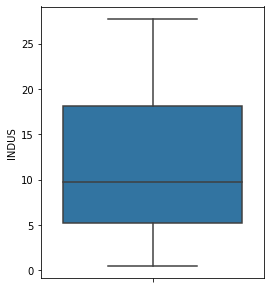

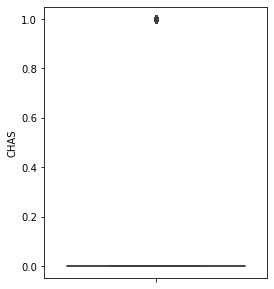

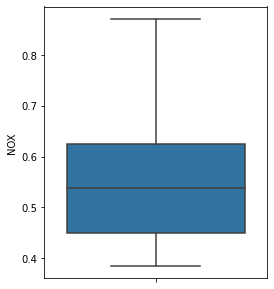

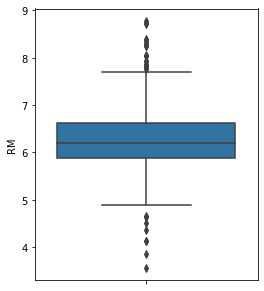

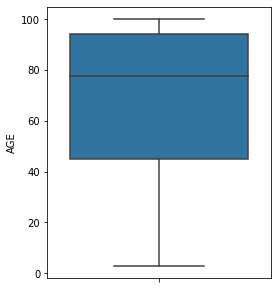

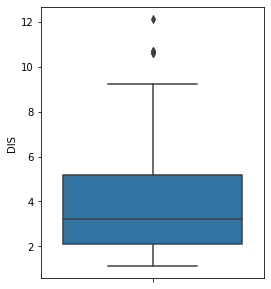

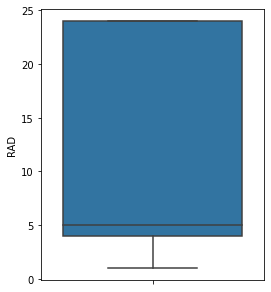

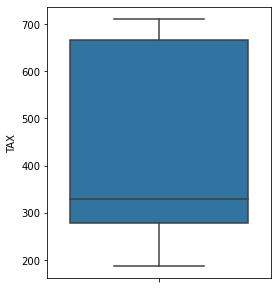

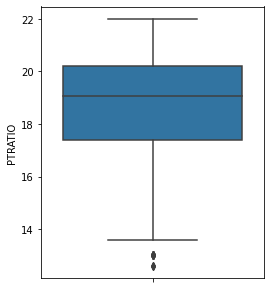

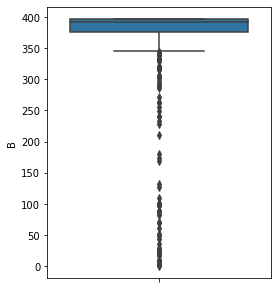

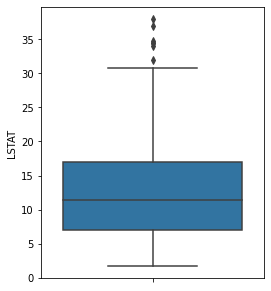

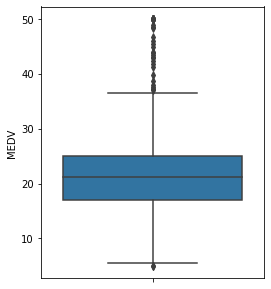

In [16]:
for feature in df.columns:
    plt.subplots(figsize=(4,5))
    sns.boxplot(y=feature,data=df)
    plt.show()


Outliers are present in most of the columns hence, we need to treat the outlier

In [17]:
## Checking the colinearity between the independent variable
## checking collinearity using Pearson correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


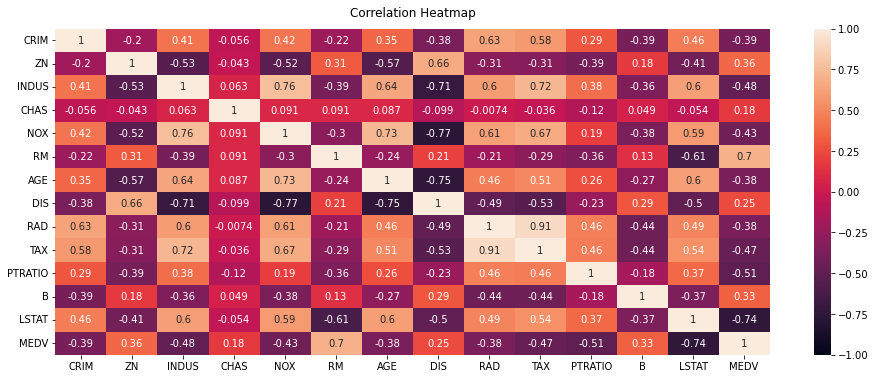

In [18]:
## Checking collinearity using heatmap
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Here we can conclude that none of the column is highly coorelated hence we will not face multi collinearity issue.

In [19]:
## Vizulazing the scatter plot between independent and target(dependent) variable

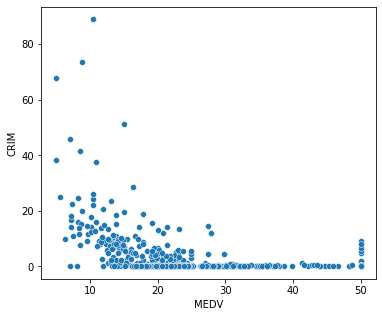

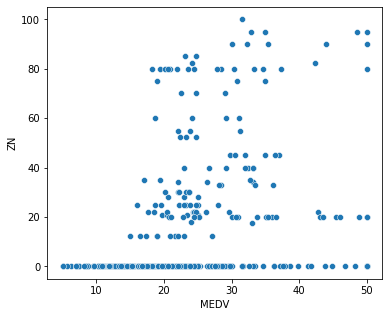

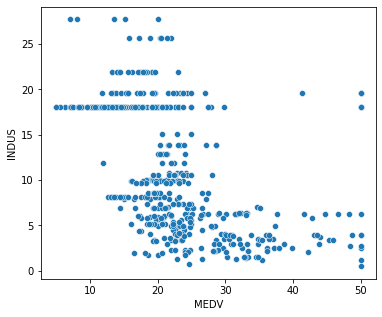

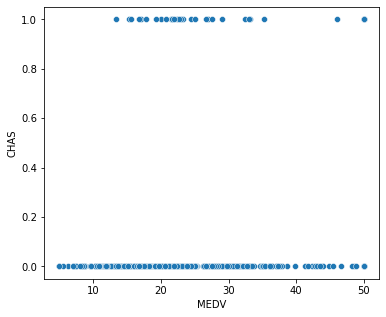

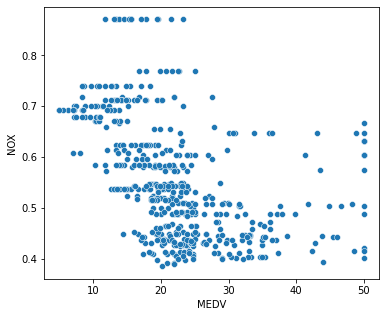

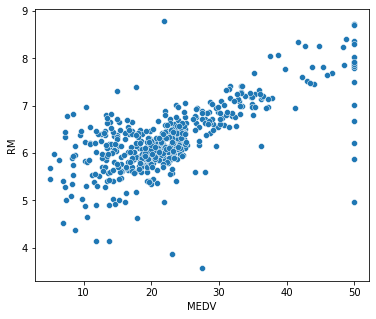

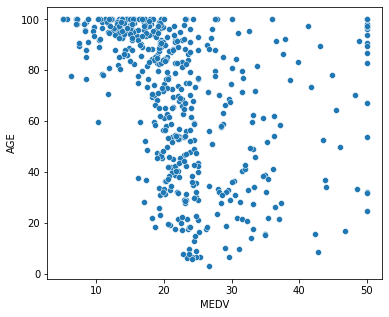

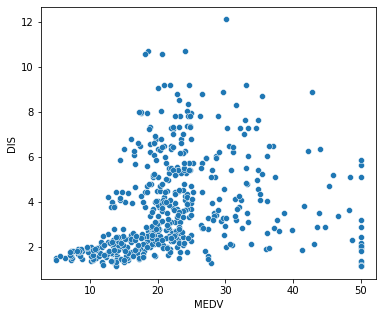

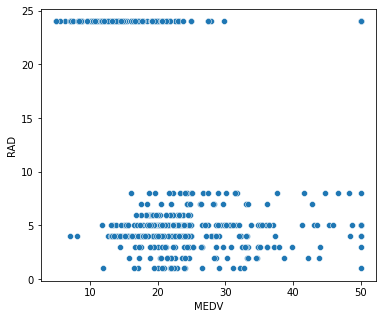

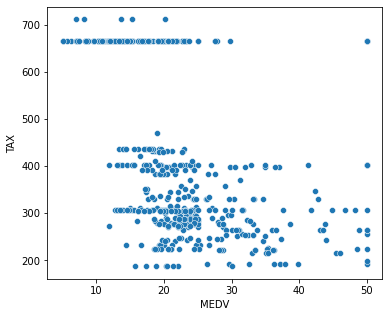

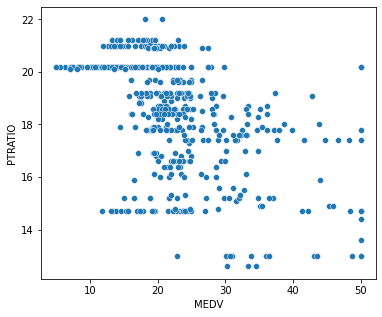

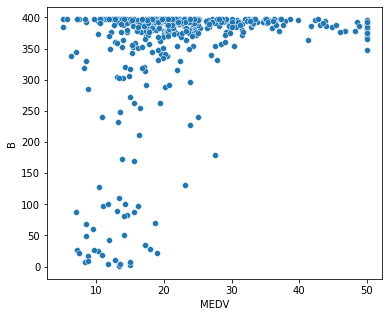

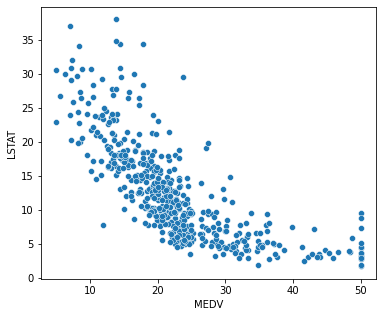

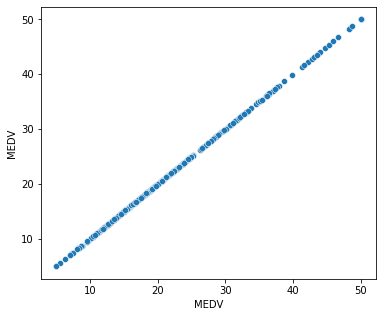

In [20]:
for feature in df.columns:
    plt.subplots(figsize=(6,5))
    sns.scatterplot(x=df['MEDV'],y=feature,data=df)
    plt.plot()


## Feature engineering

In [ ]:
## We will handle the outliers

In [ ]:
def treating_outlier(data,feature):
    q1 = data[feature].quantile(0.25)
    q2 = data[feature].quantile(0.5)
    q3 = data[feature].quantile(0.75)
    
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    
    outlier = []
    for x in df[feature]:
        if((x>upper) or (x<lower)):
            outlier.append(x)
    
    median = data[feature].median()
    data[feature].replace(to_replace=outlier,value=median,inplace=True)

In [ ]:
for feature in df.columns:
    treating_outlier(df,feature)

In [ ]:
for feature in df.columns:
    plt.subplots(figsize=(4,5))
    sns.boxplot(y=feature,data=df)
    plt.show()

In [ ]:
## Checking correlation again
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [21]:
X = df.drop(labels='MEDV',axis=True)
Y = df[['MEDV']]

## Model fitting

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
lin_model.score(X_train, Y_train)

0.7383393920590519

In [27]:
lin_model.score(X_test, Y_test)

0.7334492147453113

In [38]:
y_pred_train=lin_model.predict(X_train)

In [33]:
y_pred_test=lin_model.predict(X_test)

In [39]:
print("Mean square error of training data : ",np.mean((y_pred_train - Y_train)**2))

Mean square error of training data :  MEDV    22.47709
dtype: float64


In [40]:
print("Mean square error of test data : ",np.mean((y_pred_test - Y_test)**2))

Mean square error of test data :  MEDV    20.869292
dtype: float64


In [49]:
X_train.shape[1]

13

In [51]:
### Adjusted R2 value because it have more independent values
def adjusted_r2(x,y):
    r2 = lin_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [52]:
adjusted_r2(X_train,Y_train)

0.7296173717943536

In [53]:
adjusted_r2(X_test,Y_test)

0.6940723941963232

<AxesSubplot:ylabel='MEDV'>

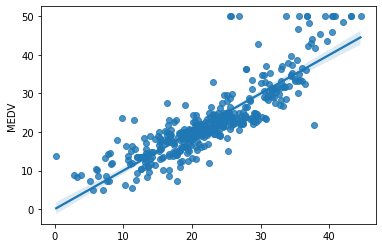

In [59]:
sns.regplot(x=y_pred_train,y=Y_train)

<AxesSubplot:ylabel='MEDV'>

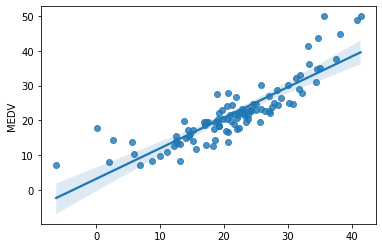

In [60]:
sns.regplot(x=y_pred_test,y=Y_test)

In [62]:
import pickle

In [63]:
filename = "final_model.pickle"

In [64]:
pickle.dump(lin_model, open(filename,'wb'))

In [65]:
loaded_model = pickle.load(open(filename, 'rb'))

In [66]:
loaded_model.score(X_train,Y_train)

0.7383393920590519